## Data Reliability

In [1]:
import pandas as pd

### Reading the Data
The two datasets that were relabelled are read in into `ann_1` and `ann_2` respectively. Then the corresponding entries from the real dataset are collected and the dataframes are combined to create two dataframes, each holding 200 labels made by annotater 1 and annotator 2 individually on the same data.

In [2]:
ann_1 = pd.read_csv('../data/reliability/sam-reliability-labelled.csv')
ann_2 = pd.read_csv('../data/reliability/tony-reliability-labelled.csv')
df_ann_1_2 = pd.read_csv('../data/labelled/sam-dataset-labelled.csv')
ann_1_2 = df_ann_1_2[df_ann_1_2['comment_id'].isin(ann_2['comment_id'])]
df_ann_2_2 = pd.read_csv('../data/labelled/tony-dataset-labelled.csv')
ann_2_2 = df_ann_2_2[df_ann_2_2['comment_id'].isin(ann_1['comment_id'])]

ann_1 = pd.concat([ann_1, ann_1_2], axis=0)
ann_2 = pd.concat([ann_2, ann_2_2], axis=0)

### Comparing the Annotations
In order to compare the annotations we used **Cohen's Kappa coefficient**. To do this, first we simply counted the following occurences:
- When both annotaters labelled a comment as *spam*
- When annotater 1 labelled a comment as *spam* and annotator 2 labelled the comment as *ham*
- When annotater 1 labelled a comment as *ham* and annotator 2 labelled the comment as *spam*
- When both annotaters labelled a comment as *ham*

In [3]:
ids = ann_1['comment_id'].tolist()
spam_spam = 0
spam_ham = 0
spam_neutral = 0
ham_spam = 0
ham_ham = 0
ham_neutral = 0
neutral_spam = 0
neutral_ham = 0
neutral_neutral = 0
total = len(ids)
for id in ids:
    if ann_2.loc[ann_2['comment_id'] == id].empty:
        print("Not good")

    class_1 = ann_1.loc[ann_1['comment_id'] == id]['class'].tolist()[0]
    class_2 = ann_2.loc[ann_2['comment_id'] == id]['class'].tolist()[0]
    
    if class_1 == "spam" and class_2 == "spam":
        spam_spam += 1
    elif class_1 == "spam" and class_2 == "ham":
        spam_ham += 1
    elif class_1 == "spam" and class_2 == "neutral":
        spam_neutral += 1
    elif class_1 == "ham" and class_2 == "spam":
        ham_spam += 1
    elif class_1 == "ham" and class_2 == "ham":
        ham_ham += 1
    elif class_1 == "spam" and class_2 == "neutral":
        ham_neutral += 1
    elif class_1 == "neutral" and class_2 == "spam":
        neutral_spam += 1
    elif class_1 == "neutral" and class_2 == "ham":
        neutral_ham += 1
    elif class_1 == "neutral" and class_2 == "neutral":
        neutral_neutral += 1

The calculated totals can be used to build a table to see the values:

In [4]:
ann_1_spam = spam_spam + spam_ham + spam_neutral
ann_1_ham = ham_spam + ham_ham + ham_neutral
ann_1_neutral = neutral_spam + neutral_ham + neutral_neutral
ann_2_spam = spam_spam + ham_spam + neutral_spam
ann_2_ham = spam_ham + ham_ham + neutral_ham
ann_2_neutral = spam_neutral + ham_neutral + neutral_neutral

print(f"|----------------------------------------------------------------|")
print(f"|                         |              Annotater 1             |")
print(f"|                         |--------|-------|-----------|---------|")
print(f"|                         |  spam  |  ham  |  neutral  |  total  |")
print(f"|-------------------------|--------|-------|-----------|---------|")
print(f"|  Annotater 2  |   spam  |  {spam_spam}  |  {ham_spam}  |  {neutral_spam}  |  {ann_2_spam}  |")
print(f"|               |---------|--------|-------|-----------|---------|")
print(f"|               |   ham   |  {spam_ham}  |  {ham_ham}  |  {neutral_ham}  |  {ann_2_ham}  |")
print(f"|               |---------|--------|-------|-----------|---------|")
print(f"|               | neutral |  {spam_neutral}  |  {ham_neutral}  |  {neutral_neutral}  |  {ann_2_neutral}  |")
print(f"|               |---------|--------|-------|-----------|---------|")
print(f"|               |  total  |  {ann_1_spam}  |  {ann_1_ham}  |  {ann_1_neutral}  |  {total}  |")
print(f"|----------------------------------------------------------------|")

|----------------------------------------------------------------|
|                         |              Annotater 1             |
|                         |--------|-------|-----------|---------|
|                         |  spam  |  ham  |  neutral  |  total  |
|-------------------------|--------|-------|-----------|---------|
|  Annotater 2  |   spam  |  9  |  1  |  0  |  10  |
|               |---------|--------|-------|-----------|---------|
|               |   ham   |  0  |  57  |  3  |  60  |
|               |---------|--------|-------|-----------|---------|
|               | neutral |  0  |  0  |  26  |  26  |
|               |---------|--------|-------|-----------|---------|
|               |  total  |  9  |  58  |  29  |  200  |
|----------------------------------------------------------------|


Using the values that we counted, we can plug them into the function for **Cohen's Kappa** to find the values of our *observed agreement*, *expeted agreement*, and *kappa*.


#### Cohen's Kappa Formula
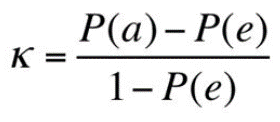

Two annotaters *A1* and *A2*

Observed Agreement:
*P(a)* = *P(A1=spam, A2=spam)* + *P(A1=ham, A2=ham)* + *P(A1=neutral, A2-neutral)*

Expected Agreement:
*P(e)* = *P(A1=spam)* * *P(A2=spam)* + *P(A1=ham)* * *P(A2=ham)* + *P(A1=neutral)* * *P(A2=neutral)*

In [5]:
observed_agreement = (spam_spam/total) + (ham_ham/total) + (neutral_neutral/total)
expected_agreeement = (ann_1_spam/total + ann_2_spam/total) + (ann_1_ham/total + ann_2_ham/total) + (ann_1_neutral/total + ann_2_neutral/total)
kappa = (observed_agreement - expected_agreeement) / (1 - expected_agreeement)

In [6]:
print(f"Observed Agreement: {observed_agreement}")
print(f"Expected Agreement: {expected_agreeement}")
print(f"Kappa: {kappa}")

Observed Agreement: 0.45999999999999996
Expected Agreement: 0.96
Kappa: -12.49999999999999


### Results
**Landis and Koch, 1977** came up with the following interpretation of the coefficient. Their interpretation was:

*slight < 0.2 < fair < 0.4 < moderate < 0.6 < substantial < 0.8 < perfect*

*Others also state that any value above around 0.8 is a high agreement and shows that the data is reliable.* 

We obtained a value of **0.94**, showing a high agreement between the annotaters. From this we can safely state that the agreement on what is and what is not spam for our dataset is high and we can safely use this to train a neural network, without introducing contradiction to the network.

Landis, J. R., & Koch, G. G. (1977). The Measurement of Observer Agreement for Categorical Data. Biometrics, 33(1), 159–174. https://doi.org/10.2307/2529310